In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/emilfalk/Desktop/Rich_Global_Condom_Usage_Dataset.csv")

In [5]:
print("Shape of df:", df.shape) 
print("\nColumn names and data types:\n", df.dtypes)  

Shape of df: (550, 15)

Column names and data types:
 Year                                      int64
Country                                  object
Total Sales (Million Units)               int64
Market Revenue (Million USD)            float64
Government Campaigns                     object
Awareness Index (0-10)                  float64
Most Popular Condom Type                 object
Contraceptive Usage Rate (%)            float64
Teen Pregnancy Rate (per 1000 teens)    float64
HIV Prevention Awareness (%)            float64
Online Sales (%)                        float64
Average Price per Condom (USD)          float64
Male vs Female Purchases (%)             object
Brand Dominance                          object
Sex Education Programs (Yes/No)          object
dtype: object


In [12]:
df = df[df['Country'] == 'USA']

In [14]:
df

,Year,Country,Total Sales (Million Units),Market Revenue (Million USD),Government Campaigns,Awareness Index (0-10),Most Popular Condom Type,Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD),Male vs Female Purchases (%),Brand Dominance,Sex Education Programs (Yes/No),Awareness Bin
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,69% Male - 39% Female,Kamasutra,No,2-3
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,50% Male - 33% Female,Skyn,No,9-10
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,46% Male - 54% Female,Skyn,Yes,5-6
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,49% Male - 57% Female,Manforce,No,3-4
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,40% Male - 29% Female,Trojan,Yes,5-6
50,2016,USA,2248,6255.599381,No,6.38,Latex,38.88,21.65,44.14,58.35,1.95,72% Male - 38% Female,Okamoto,Yes,6-7
51,2016,USA,938,1089.898270,No,7.19,Textured,93.30,17.55,76.23,24.87,1.34,64% Male - 23% Female,Kamasutra,No,7-8
52,2016,USA,240,494.785201,No,9.33,Textured,59.81,44.27,41.98,35.49,0.43,59% Male - 54% Female,Skyn,Yes,9-10
53,2016,USA,2265,1614.319895,No,2.56,Latex,28.78,65.79,70.03,26.43,1.14,71% Male - 55% Female,LifeStyles,Yes,2-3
54,2016,USA,2060,4645.623552,Yes,3.70,Non-Latex,26.57,18.66,72.79,51.59,1.41,59% Male - 35% Female,Kamasutra,Yes,3-4


In [15]:
df.isnull().sum()

Year                                    0
Country                                 0
Total Sales (Million Units)             0
Market Revenue (Million USD)            0
Government Campaigns                    0
Awareness Index (0-10)                  0
Most Popular Condom Type                0
Contraceptive Usage Rate (%)            0
Teen Pregnancy Rate (per 1000 teens)    0
HIV Prevention Awareness (%)            0
Online Sales (%)                        0
Average Price per Condom (USD)          0
Male vs Female Purchases (%)            0
Brand Dominance                         0
Sex Education Programs (Yes/No)         0
Awareness Bin                           0
dtype: int64

In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"\nOutliers in {col}:\n", outliers)


Outliers in Year:
 Series([], Name: Year, dtype: int64)

Outliers in Total Sales (Million Units):
 Series([], Name: Total Sales (Million Units), dtype: int64)

Outliers in Market Revenue (Million USD):
 Series([], Name: Market Revenue (Million USD), dtype: float64)

Outliers in Awareness Index (0-10):
 Series([], Name: Awareness Index (0-10), dtype: float64)

Outliers in Contraceptive Usage Rate (%):
 Series([], Name: Contraceptive Usage Rate (%), dtype: float64)

Outliers in Teen Pregnancy Rate (per 1000 teens):
 Series([], Name: Teen Pregnancy Rate (per 1000 teens), dtype: float64)

Outliers in HIV Prevention Awareness (%):
 Series([], Name: HIV Prevention Awareness (%), dtype: float64)

Outliers in Online Sales (%):
 Series([], Name: Online Sales (%), dtype: float64)

Outliers in Average Price per Condom (USD):
 Series([], Name: Average Price per Condom (USD), dtype: float64)


In [17]:
df.describe()

,Year,Total Sales (Million Units),Market Revenue (Million USD),Awareness Index (0-10),Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD)
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.00000
mean,2020.000000,1378.727273,2718.100502,6.118727,51.046909,38.723818,64.210909,39.992545,1.37000
std,3.191424,752.682326,1994.905794,2.500067,23.288320,19.674971,22.318883,20.051635,0.65573
min,2015.000000,118.000000,222.005079,2.010000,16.660000,3.330000,26.700000,5.260000,0.24000
25%,2017.000000,625.000000,1035.922553,3.655000,30.655000,20.500000,44.445000,24.215000,0.85500
50%,2020.000000,1558.000000,2391.573696,6.490000,48.320000,44.170000,69.250000,44.400000,1.41000
75%,2023.000000,2025.000000,3778.818283,8.475000,66.430000,55.730000,82.545000,56.850000,1.94000
max,2025.000000,2496.000000,7129.030946,9.880000,94.830000,67.950000,96.880000,69.960000,2.48000


## Questions to answer

- Does high Awareness Index mean high Usage Rate?
- Are there any differences when more Men purchases condoms vs when more Female purchases condoms?
- How does a Sex Education Program affect the different features?
- Is it worth investing in Government Campaigns with purpose to increase the Contraceptive Usage Rate?
- What are the characteristics with high Teen Pregnancy Rate?

### Question: Does high Awareness Index mean high Usage Rate?

/var/folders/bh/xwgnq3j17xz_6686kqbc079r0000gn/T/ipykernel_30181/1138593584.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_usage = df.groupby('Awareness Bin')['Contraceptive Usage Rate (%)'].mean()


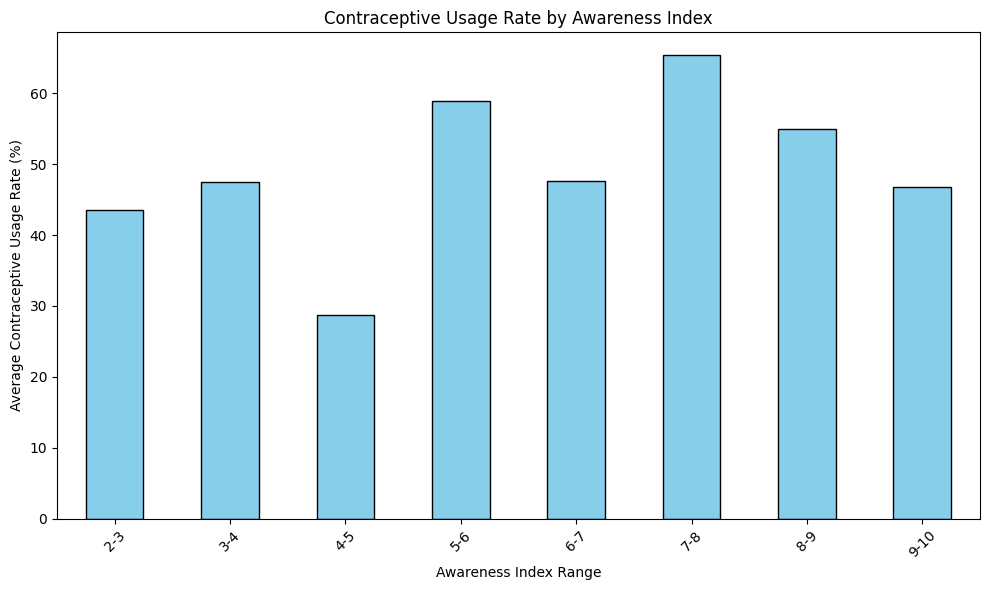

In [18]:
bins = range(2, 11) 
labels = [f'{i}-{i+1}' for i in range(2, 10)] 

df['Awareness Bin'] = pd.cut(df['Awareness Index (0-10)'], bins=bins, labels=labels, include_lowest=True)

avg_usage = df.groupby('Awareness Bin')['Contraceptive Usage Rate (%)'].mean()

plt.figure(figsize=(10, 6)) 
avg_usage.plot(kind='bar', edgecolor='black', color='skyblue')

plt.title('Contraceptive Usage Rate by Awareness Index')
plt.xlabel('Awareness Index Range')
plt.ylabel('Average Contraceptive Usage Rate (%)')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

### Answer: No, high Awareness Index do not equal high Contraceptive Usage Rate

Countries with an awareness index between 7-8 seemed to have the highest usage rate, followed by an awareness index between 5-6 and followed by suprisingly countries with an awareness index between 2-3. There is no sign according to the table that a higher awareness index would lead to a higher usage rate.

### Question: Are there any differences when more Men purchases condoms vs when more Female purchases condoms?

In [19]:
df[['male_purchase', 'female_purchase']] = df['Male vs Female Purchases (%)'].str.extract(r'(\d+)% Male - (\d+)% Female')

df['male_purchase'] = pd.to_numeric(df['male_purchase'])
df['female_purchase'] = pd.to_numeric(df['female_purchase'])
df['purchase_dominance'] = df.apply(lambda row: 'Male' if row['male_purchase'] > row['female_purchase'] else 'Female', axis=1)
df = df.drop("Male vs Female Purchases (%)", axis = 1)

In [20]:
df

,Year,Country,Total Sales (Million Units),Market Revenue (Million USD),Government Campaigns,Awareness Index (0-10),Most Popular Condom Type,Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD),Brand Dominance,Sex Education Programs (Yes/No),Awareness Bin,male_purchase,female_purchase,purchase_dominance
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,Kamasutra,No,2-3,69,39,Male
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,Skyn,No,9-10,50,33,Male
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,Skyn,Yes,5-6,46,54,Female
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,Manforce,No,3-4,49,57,Female
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,Trojan,Yes,5-6,40,29,Male
50,2016,USA,2248,6255.599381,No,6.38,Latex,38.88,21.65,44.14,58.35,1.95,Okamoto,Yes,6-7,72,38,Male
51,2016,USA,938,1089.898270,No,7.19,Textured,93.30,17.55,76.23,24.87,1.34,Kamasutra,No,7-8,64,23,Male
52,2016,USA,240,494.785201,No,9.33,Textured,59.81,44.27,41.98,35.49,0.43,Skyn,Yes,9-10,59,54,Male
53,2016,USA,2265,1614.319895,No,2.56,Latex,28.78,65.79,70.03,26.43,1.14,LifeStyles,Yes,2-3,71,55,Male
54,2016,USA,2060,4645.623552,Yes,3.70,Non-Latex,26.57,18.66,72.79,51.59,1.41,Kamasutra,Yes,3-4,59,35,Male


In [21]:
male_df = df[df['purchase_dominance'] == "Male"]
male_df = male_df.drop(["male_purchase", "female_purchase"], axis = 1)
female_df = df[df['purchase_dominance'] == "Female"]
female_df = female_df.drop(["male_purchase", "female_purchase"], axis = 1)

In [22]:
male_df.describe()

,Year,Total Sales (Million Units),Market Revenue (Million USD),Awareness Index (0-10),Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD)
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,2020.086957,1434.739130,2667.796810,6.021739,48.535000,37.990435,64.919348,37.481522,1.306739
std,3.216804,742.055836,1936.184224,2.393774,21.956724,20.041712,22.383777,19.886416,0.647110
min,2015.000000,240.000000,276.304977,2.010000,16.660000,3.330000,28.040000,5.260000,0.240000
25%,2017.250000,738.750000,1008.934695,3.685000,28.637500,19.407500,44.292500,19.592500,0.782500
50%,2020.000000,1712.000000,2308.807259,6.435000,45.090000,43.550000,69.640000,41.745000,1.370000
75%,2023.000000,2059.000000,3736.679999,7.967500,63.577500,54.747500,85.567500,53.427500,1.767500
max,2025.000000,2451.000000,7129.030946,9.880000,93.300000,67.950000,96.880000,69.960000,2.430000


In [23]:
female_df.describe()

,Year,Total Sales (Million Units),Market Revenue (Million USD),Awareness Index (0-10),Contraceptive Usage Rate (%),Teen Pregnancy Rate (per 1000 teens),HIV Prevention Awareness (%),Online Sales (%),Average Price per Condom (USD)
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2019.555556,1092.444444,2975.208266,6.614444,63.885556,42.472222,60.590000,52.826667,1.693333
std,3.205897,785.144113,2384.672186,3.102761,26.968859,18.293739,22.944403,16.367165,0.637397
min,2015.000000,118.000000,222.005079,2.210000,30.470000,17.880000,26.700000,24.880000,0.620000
25%,2017.000000,593.000000,1348.457815,3.630000,45.280000,22.270000,51.090000,48.960000,1.260000
50%,2020.000000,712.000000,2467.585962,8.530000,56.210000,48.150000,56.130000,56.830000,1.670000
75%,2022.000000,1519.000000,4993.892125,9.200000,89.710000,55.860000,78.360000,66.490000,2.300000
max,2024.000000,2496.000000,6564.222333,9.670000,94.830000,67.250000,90.440000,69.490000,2.480000


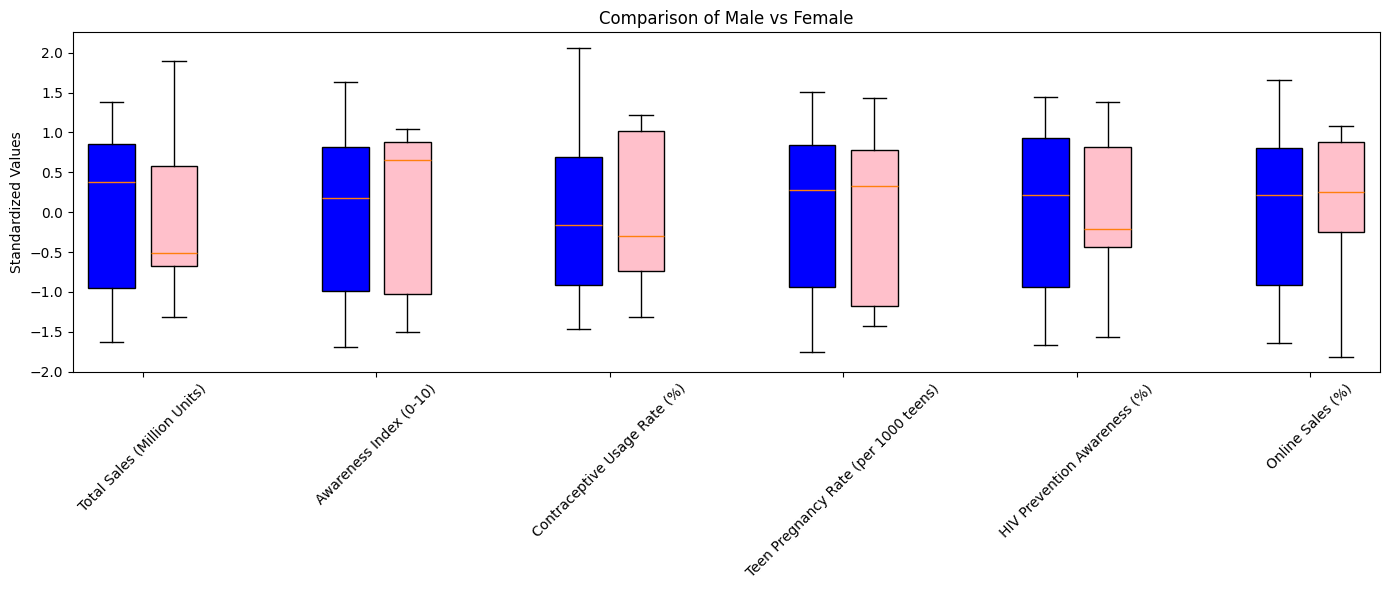

In [24]:
features = [
    "Total Sales (Million Units)",
    "Awareness Index (0-10)",
    "Contraceptive Usage Rate (%)",
    "Teen Pregnancy Rate (per 1000 teens)",
    "HIV Prevention Awareness (%)",
    "Online Sales (%)"
]

scaler_male = StandardScaler()
male_standardized = scaler_male.fit_transform(male_df[features])
male_standardized_df = pd.DataFrame(male_standardized, columns=features)

scaler_female = StandardScaler()
female_standardized = scaler_female.fit_transform(female_df[features])
female_standardized_df = pd.DataFrame(female_standardized, columns=features)

data_to_plot = []
positions = []
labels = []
pos_base = 1 

for i, feature in enumerate(features):
    data_to_plot.append(male_standardized_df[feature].dropna())
    positions.append(pos_base + i * 3)  

    data_to_plot.append(female_standardized_df[feature].dropna())
    positions.append(pos_base + 0.8 + i * 3) 
    
    labels.append(feature)

plt.figure(figsize=(14, 6))  
box = plt.boxplot(
    data_to_plot,
    positions=positions,
    patch_artist=True, 
    widths=0.6 
)

colors = ['blue', 'pink'] * len(features) 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Comparison of Male vs Female')
plt.ylabel('Standardized Values')
tick_positions = [pos_base + 0.4 + i * 3 for i in range(len(features))]
plt.xticks(tick_positions, labels, rotation=45) 

plt.tight_layout()
plt.show()

### Answer: Are there any differences when more Men purchases condoms vs when more Female purchases condoms?

Yes, there are differences between female and male dominated condom purchases. On average, surveys where females are the most dominant customers, the condom sales are significantly lower. A reason for this could be that there are fewer surveys where women are the dominant customer or that people in general of the survey do not prefer condoms except for a few women. Awareness index is significantly higher for women dominant customer and this makes sense because if women are most aware of condoms, then they will most likely be the dominant customer. The usage rate is lower for female dominant customers which could mean that there are a few women dominating the condom sales and a symptom of that is the teen pregnancy rate which is slightly higher when women dominate sales and that could be a reason why women purchase condoms more often. HIV prevention awareness are more dominant in surveys where men are the dominant customer. A reason for this could be that HIV is more often appeared in public as a "male disease", and that condoms are the only protection against it and therefore more men are cautious about HIV which drives the condom sales up for men. Online sales are slightly higher for women dominated customers which could mean that more women prefer online purchase of condoms.

### Question: How does a Sex Education Program affect the different features?

/var/folders/bh/xwgnq3j17xz_6686kqbc079r0000gn/T/ipykernel_30181/2246134935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/bh/xwgnq3j17xz_6686kqbc079r0000gn/T/ipykernel_30181/2246134935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/bh/xwgnq3j17xz_6686kqbc079r0000gn/T/ipykernel_30181/2246134935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/bh/xwgnq3j17xz_6686kqbc079r0000gn/T/ipykernel_30181/2246134935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is d

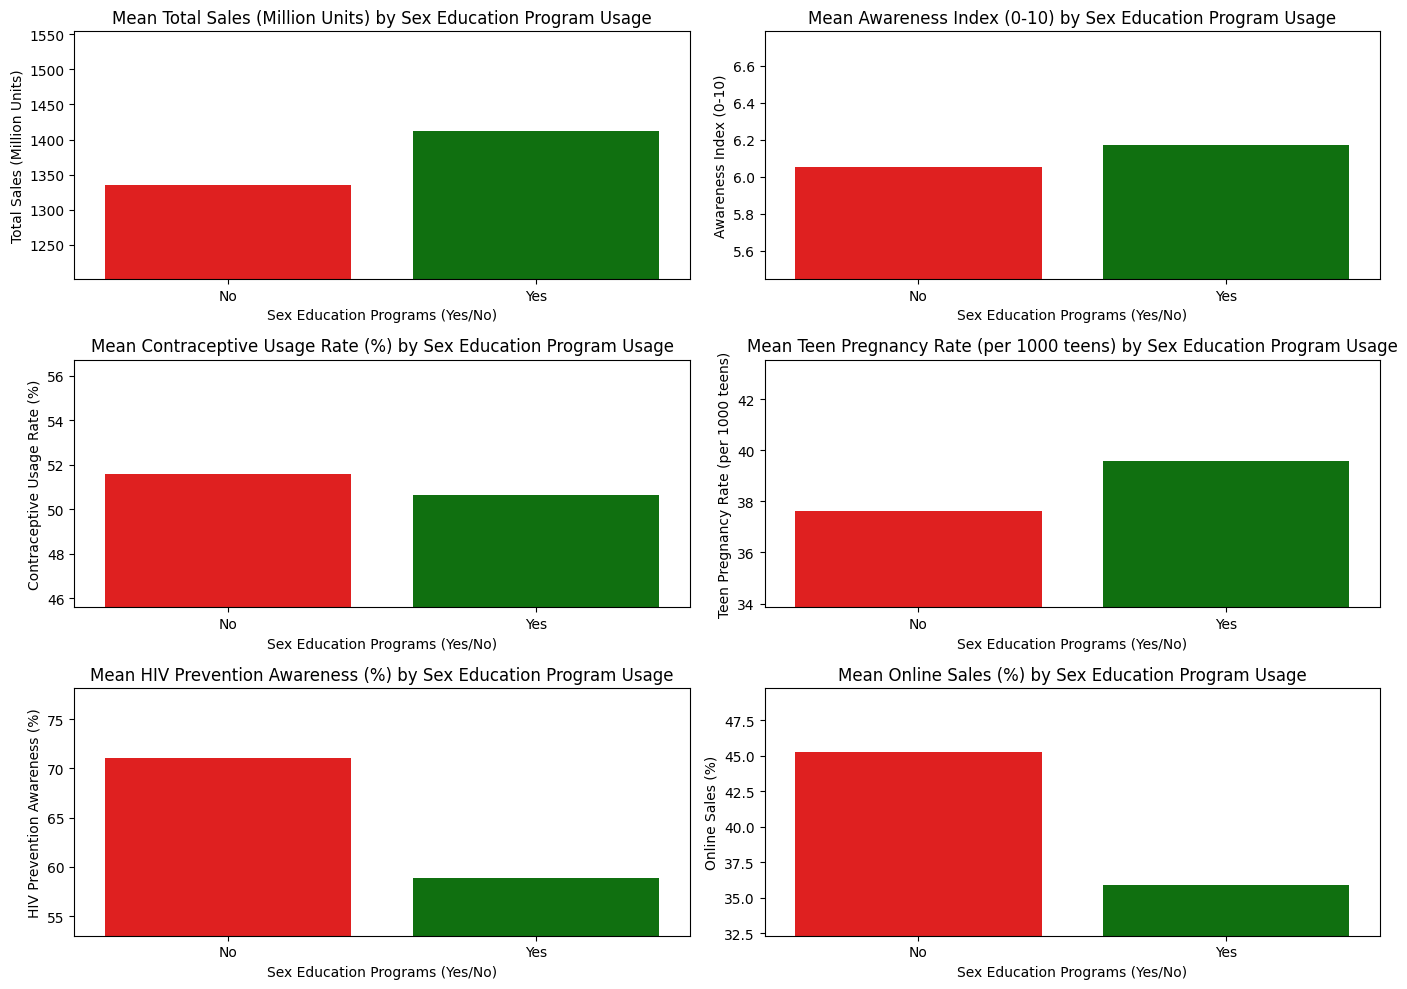

In [25]:
grouped_means = df.groupby("Sex Education Programs (Yes/No)")[features].mean().reset_index()

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    ax = sns.barplot(
        x="Sex Education Programs (Yes/No)",
        y=feature,
        data=grouped_means,
        palette=['red', 'green']
    )
    min_val = grouped_means[feature].min() * 0.9 
    max_val = grouped_means[feature].max() * 1.1  
    plt.ylim(min_val, max_val)
    plt.title(f'Mean {feature} by Sex Education Program Usage')

plt.tight_layout()
plt.show()

### Answer: How does a Sex Education Program affect the different features?

A Sex Education Program makes people more aware of safe sex and increase condom sales, which is good. However the contraceptive usage rate decreases if you implement a sex ed program and therefore teen pregnancies increases. This could be a cultural thing where those people who have most of the intercourse practice it without condoms or it could be due to technology, i.e. more females are aware of their cycles etc. The HIV awareness prevention decreases but a reason for that could be that HIV isn't as talked about as it was 30 years ago or that surveys with no sex ed program use old school tools where HIV is very present. The online sales decreases but a reason for this could be that condoms are provided for free for those schools having a sex ed program.

### Question: Is it worth investing in Government Campaigns with purpose to increase the Contraceptive Usage Rate?

/var/folders/bh/xwgnq3j17xz_6686kqbc079r0000gn/T/ipykernel_30181/4058673832.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/bh/xwgnq3j17xz_6686kqbc079r0000gn/T/ipykernel_30181/4058673832.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/bh/xwgnq3j17xz_6686kqbc079r0000gn/T/ipykernel_30181/4058673832.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/bh/xwgnq3j17xz_6686kqbc079r0000gn/T/ipykernel_30181/4058673832.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is d

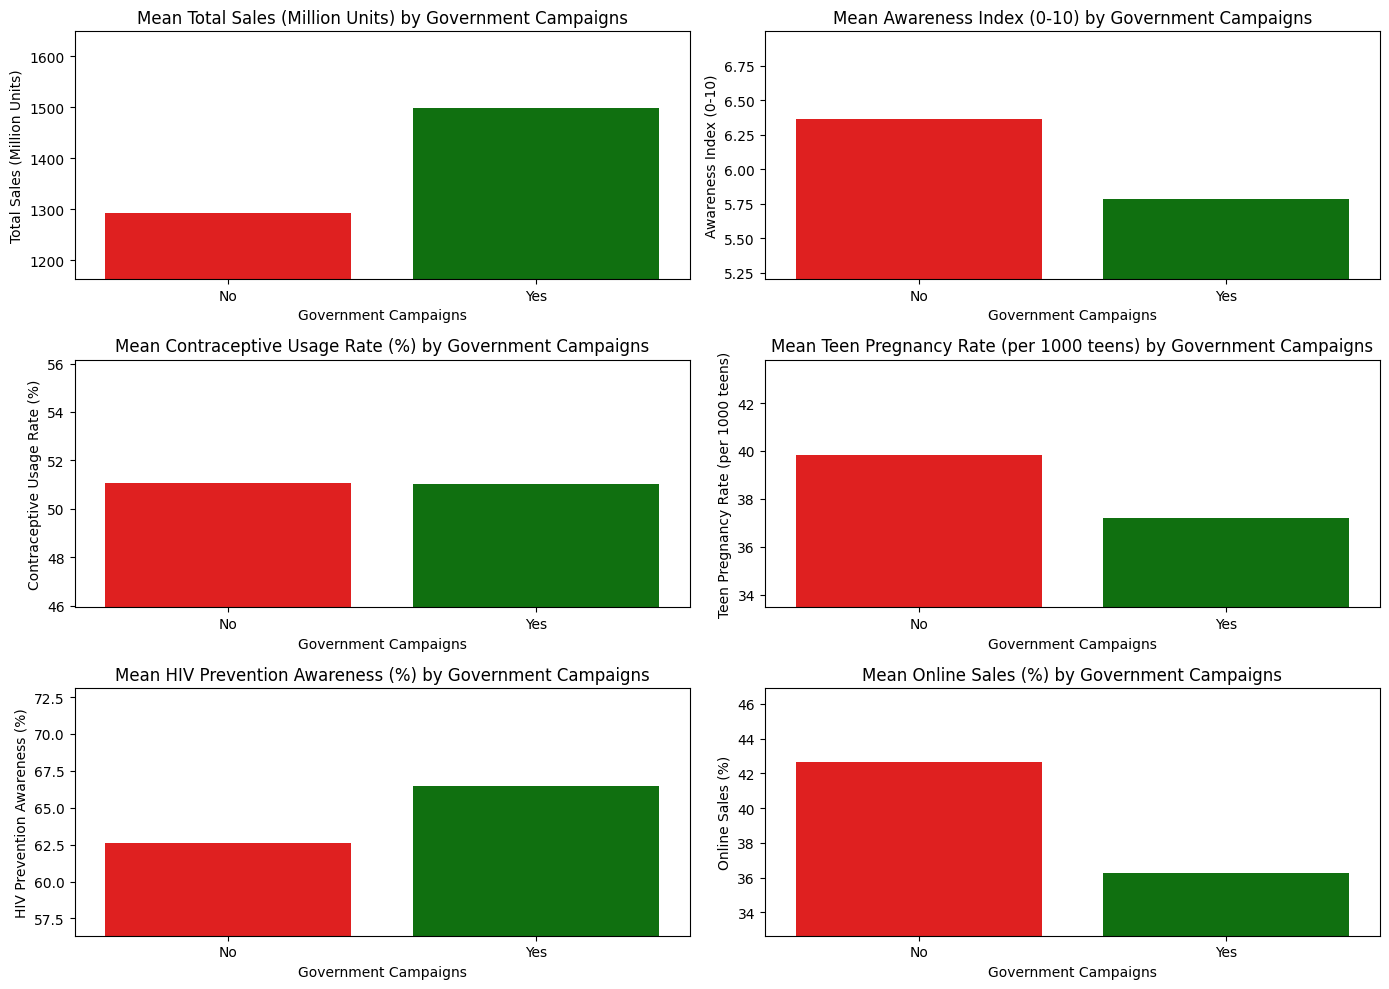

In [26]:
grouped_means = df.groupby("Government Campaigns")[features].mean().reset_index()

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    ax = sns.barplot(
        x="Government Campaigns",
        y=feature,
        data=grouped_means,
        palette=['red', 'green']
    )
    min_val = grouped_means[feature].min() * 0.9 
    max_val = grouped_means[feature].max() * 1.1  
    plt.ylim(min_val, max_val)
    plt.title(f'Mean {feature} by Government Campaigns')

plt.tight_layout()
plt.show()

### Answer: Is it worth investing in Government Campaigns with purpose to increase the Contraceptive Usage Rate?

Maybe, depending on what the goal is. If the goal is to increase contraceptive sales and hiv awareness while teen pregnancies decreases, then yes it is worth it. If you want to decrease awareness, then do it as well, but I do not recommend that. If you want to increase the contraceptive usage rate, then don't do it since there are no significant change so better to save that money. 

### Question: What are the characteristics with high Teen Pregnancy Rate?

/var/folders/bh/xwgnq3j17xz_6686kqbc079r0000gn/T/ipykernel_30181/3720184272.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_means = df.groupby('Teen Pregnancy Bins')[features].mean().reset_index()


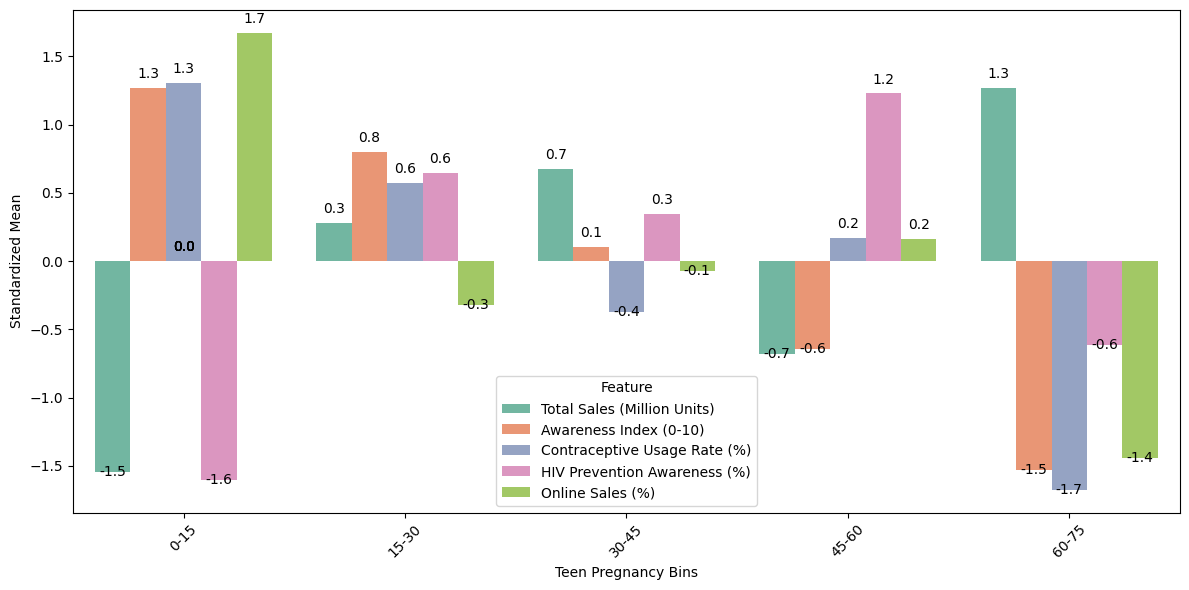

In [27]:
features = [
    "Total Sales (Million Units)",
    "Awareness Index (0-10)",
    "Contraceptive Usage Rate (%)",
    "HIV Prevention Awareness (%)",
    "Online Sales (%)"
]

bins = [0, 15, 30, 45, 60, 75] 
bin_labels = ['0-15', '15-30', '30-45', '45-60', '60-75']

df['Teen Pregnancy Bins'] = pd.cut(
    df['Teen Pregnancy Rate (per 1000 teens)'],
    bins=bins,
    labels=bin_labels,
    include_lowest=True 
)

grouped_means = df.groupby('Teen Pregnancy Bins')[features].mean().reset_index()

scaler = StandardScaler()
standardized_values = scaler.fit_transform(grouped_means[features])
standardized_df = pd.DataFrame(standardized_values, columns=features)
standardized_df['Teen Pregnancy Bins'] = grouped_means['Teen Pregnancy Bins']

melted_df = standardized_df.melt(
    id_vars=['Teen Pregnancy Bins'],
    value_vars=features,
    var_name='Feature',
    value_name='Standardized Mean'
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Teen Pregnancy Bins',
    y='Standardized Mean',
    hue='Feature',
    data=melted_df,
    palette='Set2'
)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1f}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom' if height >= 0 else 'top',
        xytext=(0, 5),
        textcoords='offset points'
    )
plt.xticks(rotation=45)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

### Answer: What are the characteristics with high Teen Pregnancy Rate?

Awareness Index and Contraceptive Usage Rate are consistently low. However for the highest group, online sales are low while sales are high. This could indicate that either some contraceptive methods are not reliable or that people who might think it's embarrasing to purchase condoms are not aware of online options meaning that they might go on without a contraceptive.